# iNaturalist Data from the Global Biodiversity Information Facility (GBIF): Dataset Overview and Use Case Examples
## EDS 220, Fall 2022

This notebook will help you navigate, download, and use iNaturalist data from GBIF.

#### Authors
All authors are affiliated with the Bren School of Environmental Science and Management at the University of California Santa Barbara.
- Kiran Favre, Masters of Environmental Data Science, 2023, kfavre@ucsb.edu
- Jillian Allison, Masters of Environmental Data Science, 2023, jilliannallison@ucsb.edu
- Erica Bishop, Masters of Environmental Data Science, 2023, ericabishop@ucsb.edu


## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

We are creating this notebook to: 
- Explain the contents of iNaturalist data: what data is collected and what is the associated metadata? 
- Demonstrate how to download this data for analysis. 
- Show programmers some examples of visualizing and working with data from iNaturalist using Python.


<a id='overview'></a> 
### Dataset Description

iNaturalist is a platform and social network for citizen scientists and biologists to upload photos of observed species along with the location and time collected. This dataset is a collection of iNaturalist research grade observations. Research grade observations are defined by having a photo, date, and coordinate provided and the community agrees upon the identification. iNaturalist users can identify the species in the photo based on previous users’ uploads and community input [1]. 

This dataset was created and hosted by iNaturalist, an initiative by the California Academy of Sciences and National Geographic Society. It is also hosted on GBIF. GBIF, according to its website, "is an international network and data infrastructure funded by the world’s governments and aimed at providing anyone, anywhere, open access to data about all types of life on Earth.” The standardized data in GBIF allows anyone in the world to access high quality ecological data [2].

The iNaturalist dataset’s temporal span is from 1768 to present. Older data is based on historical records. The iNaturalist app was created in 2008, and people with iPhones have uploaded their own data via the app in recent years. iNaturalist data covers the entire globe [1].

Some issues with data quality are highlighted by tags on the download report. Some of these issues include matching taxon to the correct identification, matching incorrect countries and coordinates, or multimedia date invalidities. [REFERENCE?]


<a id='io'></a> 
### Dataset Input/Output 

There are a few different ways that we can access iNaturalist data. iNaturalist does manage an export feature on their website, but they note that large exports slow down their infrastructure. Their top recommendation for exporting data is to use GBIF. The file format used to store the data is a tab -delimited CSV.

To access data from GBIF you first need to set up an account. You can use your GitHub account to set this up. After you've created an account, you have two options for downloading data, the GBIF API or a file download.

**Using the API**

The GBIF API is relatively easy to use. The prerequisity `pygbif` package for importing data into a python envionrment is already instealled in the Python 3 kernel on Taylor. The API includes several different modules that you can use to search and query data. The examples below show how to use the `species` module or the `occurences` module to get iNaturalist data on Adelie penguins.

There are many arguments you can use to query data from the API, and data is returned as a dictionary. Checkout the [pygbif 0.6.1 documentation](https://pygbif.readthedocs.io/en/latest/index.html) for more query examples [4].


In [1]:
import pygbif #package to interface with GBIF API - this is preloaded on the Python3 kernel on taylor
from pygbif import species #can call specific modules for searching
from pygbif import occurrences as occ #easier to rename this for shorter coding in the use cases below
adeliae_dict = species.name_lookup(institution_code="iNaturalist", q='Pygoscelis adeliae') #using the species lookup

ModuleNotFoundError: No module named 'pygbif'

**Using file download**

For easily importing data you're interested in directly in a dataframe, you may want to download a TSV file from GBIF.

**Reading in data to your environment**

1) Import necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import cartopy
import cartopy.crs as ccrs

2) Parameters for our data

Our iNaturalist data:
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

3) Read in the data:

In [4]:
sb_inat = pd.read_csv("/courses/EDS214/EDS220_gbffs/inat_sb_recent.csv", sep = '\t') #make sure to update the file path to where your data is stored


<a id='display'></a> 
### Metadata Display and Basic Visualization

iNaturalist data downloaded from GBIF contains 50 columns of identifying information for observations, including taxonomic information, location information, date, and information on the observer. The code cells below will help you investigate what's included in the subset of iNaturalist data from Santa Barbara that we downloaded. 

In [ ]:
#explore the data
print(sb_inat.head())
print(sb_inat.tail())
print(sb_inat.shape)

In [ ]:
#look at just the columns
list(sb_inat.columns)

In [ ]:
#look at how many species
print(len(sb_inat['species'].unique()))

In [ ]:
#investigate the species
sb_species = sb_inat['species']
sb_species.head()

#see how many plants there are!
sb_plants = sb_inat[sb_inat['kingdom'] == "Plantae"]
print(len(sb_plants['species'].unique()))

#what about ANIMALS?
sb_animals = sb_inat[sb_inat['kingdom'] == "Animalia"]
print(len(sb_animals['species'].unique())) #more animal observations!

Because there is so much information contained in the data, we honed in on one family of animals, Theraphosidae (tarantulas) to visualize and investigate.

In [ ]:
#filter tarantula species to plot
tarantulas = sb_inat.loc[sb_inat['family'] == "Theraphosidae"]

In [ ]:
#basic plot: number of tarantula observatons in iNaturalist by species

tarantulas['species'].value_counts().plot(kind = 'barh')



In the plot above, we can see that there are three species of tarantulas commonly sited in the Santa Barbara area, with Aphonopelma iodius, or the desert tarantula, being the most common. 

<a id='usecases'></a> 
### Use Case: Investigating Tarantula Sightings Around UCSB

PASTE IN JILLIAN'S EXAMPLE

In [ ]:
# Create geometries from your lat-lons
geom_list = [shapely.geometry.Point(lon,lat) for lon,lat in zip(tarantulas["decimalLongitude"] , tarantulas["decimalLatitude"])] # check the ordering of lon/lat

# create geopandas geodataframe
tarantulas_gdf = gpd.GeoDataFrame(tarantulas, geometry=geom_list, crs={"init":"EPSG:4326"})

tarantulas_gdf.crs # it's in degrees, we want it in meters! we should reproject it

tarantulas_rpj = tarantulas_gdf.to_crs("EPSG:6423") # NAD83 California Zone 5-- includes SB

tarantulas_rpj.crs # now the unit of measurement is in meters! 

ucsb_df = pd.DataFrame(
    {'Location': ['Bren Hall'],
     'Latitude': [34.413059],
     'Longitude': [-119.841826]})

ucsb_gdf = gpd.GeoDataFrame(
    ucsb_df, geometry=gpd.points_from_xy(ucsb_df.Longitude, ucsb_df.Latitude))

ucsb_gdf = ucsb_gdf.set_crs('EPSG:6423')

ucsb_buffer = ucsb_gdf.buffer(1610)

friendly_neighbors = tarantulas_rpj["geometry"].intersection(ucsb_buffer)

nearby_tarantulas = tarantulas_rpj[~friendly_neighbors.is_empty]

len(nearby_tarantulas) # 53 tarantulas have been reported within 1 mile of UCSB since 2008

nearby_tarantulas


ucsb_df = pd.DataFrame(
    {'Location': ['Bren Hall'],
     'Latitude': [34.413059],
     'Longitude': [-119.841826]})

ucsb_gdf = gpd.GeoDataFrame(
    ucsb_df, geometry=gpd.points_from_xy(ucsb_df.Longitude, ucsb_df.Latitude), crs={"init":"EPSG:4326"})

ucsb_gdf = ucsb_gdf.to_crs("EPSG:6423")

ucsb_buffer = ucsb_gdf.buffer(16090).unary_union

friendly_neighbors = tarantulas_rpj["geometry"].within(ucsb_buffer)

friendly_neighbors

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


In [ ]:
##Can we remove this code chunk? (I think so?)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-119,-122,32,35])   # change region to SB area
ax.coastlines()  # add coastlines

# Add coloring for ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add species data
cf = ax.contourf(sb_inat.decimalLongitude, sb_inat.decimalLatitude, tarantulas, transform=ccrs.PlateCarree())

# Add colorbar
fig.colorbar(cf,ax=ax)

### Use Case: Investigating where the most iNaturalist observations are recorded

Much ecological data, including iNaturalist data, is biased towards recording observations where the observers are, not necessarily where the species are. This means that observations don't necessarily refelect the spatial distribution of species.

### Use Case: Inaturalist Research Grade Observations of Birds In Santa Barbara

As mentioned earlier, there can be discrepancies in observations through iNaturalist and other studies. To take a closer look at the differences, we mapped the observations of all birds in this dataset. The highest order that birds share is the class 'Aves'. This part of the tutorial provides how to make a map of these species using this data.

In [10]:
#load additional packages needed to map
import datetime
import geopandas as gpd
import seaborn as sns
import shapefile as shp
import pyproj

ModuleNotFoundError: No module named 'geopandas'

In [11]:
#using data read in earlier, sb_inat
#look at columns to see if we have enough to create a spatial analysis
list(sb_inat.columns)

['gbifID',
 'datasetKey',
 'occurrenceID',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'genus',
 'species',
 'infraspecificEpithet',
 'taxonRank',
 'scientificName',
 'verbatimScientificName',
 'verbatimScientificNameAuthorship',
 'countryCode',
 'locality',
 'stateProvince',
 'occurrenceStatus',
 'individualCount',
 'publishingOrgKey',
 'decimalLatitude',
 'decimalLongitude',
 'coordinateUncertaintyInMeters',
 'coordinatePrecision',
 'elevation',
 'elevationAccuracy',
 'depth',
 'depthAccuracy',
 'eventDate',
 'day',
 'month',
 'year',
 'taxonKey',
 'speciesKey',
 'basisOfRecord',
 'institutionCode',
 'collectionCode',
 'catalogNumber',
 'recordNumber',
 'identifiedBy',
 'dateIdentified',
 'license',
 'rightsHolder',
 'recordedBy',
 'typeStatus',
 'establishmentMeans',
 'lastInterpreted',
 'mediaType',
 'issue']

In [12]:
#crop the initial data to just class, spp, and location information 
sb_inat_cropped = sb_inat[['class','species','decimalLatitude','decimalLongitude']]
sb_inat_cropped

,class,species,decimalLatitude,decimalLongitude
0,Magnoliopsida,Heteromeles arbutifolia,34.580555,-119.978333
1,Magnoliopsida,Trichostema lanatum,34.501962,-119.849755
2,Magnoliopsida,Oxalis pes-caprae,34.463828,-119.657692
3,Insecta,Bombus vosnesenskii,34.417709,-119.878154
4,Aves,Lanius ludovicianus,34.018571,-119.683640
...,...,...,...,...
141416,Magnoliopsida,Stephanomeria pauciflora,34.440431,-119.165206
141417,Aves,Columba livia,34.163761,-119.222627
141418,Arachnida,Aphonopelma iodius,34.456640,-119.709940
141419,Aves,Sayornis nigricans,34.456487,-119.709953


In [ ]:
#now we want to isolate our table to only observations of class 'Aves'
sb_aves_locs = sb_inat_cropped[sb_inat_cropped['class'] == 'Aves']
sb_aves = gpd.GeoDataFrame(sb_aves_locs)
sb_aves_spp = sb_aves_locs[['species']]
sb_aves_spp

In [13]:
#need to convert coordinates into actual coordinates, not just data points
coords = gpd.points_from_xy( sb_aves_locs['decimalLongitude'], sb_aves_locs['decimalLatitude'], crs = "EPSG:4326")


sb_aves_gdf = gpd.GeoDataFrame(sb_aves_spp, geometry=coords)
sb_aves_gdf

NameError: name 'gpd' is not defined

In [14]:
#see if this worked, if it did now we have our observations of birds plotted
sb_aves_gdf.plot(aspect = 1,
                color = "orchid")

NameError: name 'sb_aves_gdf' is not defined

In [15]:
#need to plot the observations onto a sb shapefile

#setting up shp file path for CA state boundary (found online - https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)
shp_data = gpd.read_file("/courses/EDS214/EDS220_gbffs/ca-state-boundary/CA_State_TIGER2016.shp")

#produces an outline of CA 
shp_data.plot()

NameError: name 'gpd' is not defined

In [16]:
#need to convert shp file into a lat/lon situation instead of meters
shp_reproj = shp_data.to_crs("epsg:4326") 
shp_reproj.plot()

NameError: name 'shp_data' is not defined

In [17]:
#check that this worked and that both data are on the same crs
shp_reproj.crs

NameError: name 'shp_reproj' is not defined

NameError: name 'shp_reproj' is not defined

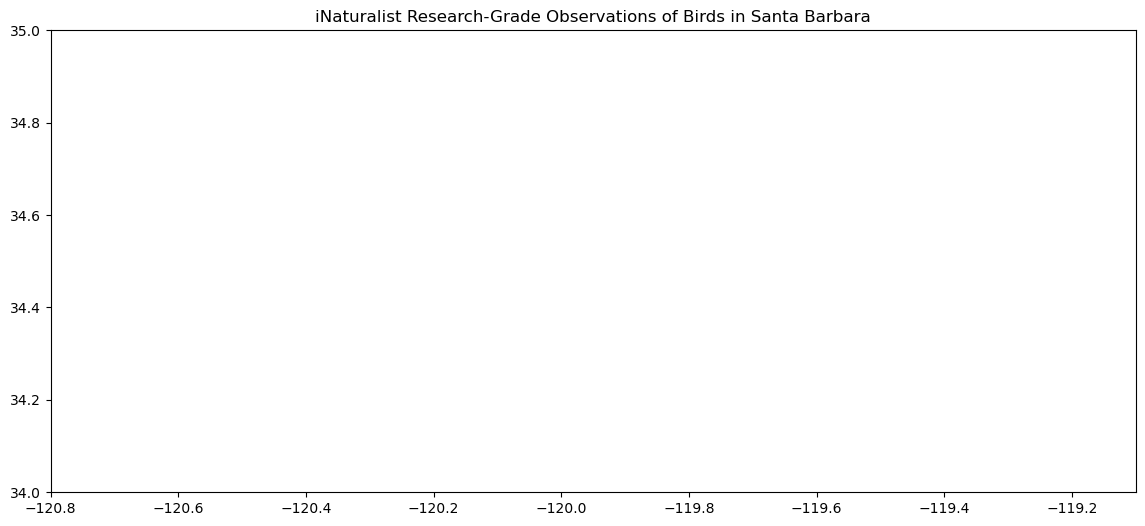

In [18]:
#make outline of sb to overlay inaturalist data onto

#defining size of output figure
fig, ax = plt.subplots(figsize=(14,6))

#setting boundaries
xmin = -120.8
xmax = -119.1
ymin = 34
ymax = 35

#feed min and max thru into limits for x and y axis
xlim = (xmin, xmax)
ylim = (ymin, ymax)

#set axis to x and y limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

#sb map
plt.title("iNaturalist Research-Grade Observations of Birds in Santa Barbara")
shp_reproj.plot(legend = False, ax = ax,
               color = "skyblue")

#sb aves 
sb_aves_gdf.plot(aspect = 1,
               color = "orangered",
                marker = "o",
                 alpha = 0.75,
                 markersize = 0.6,
               ax = ax)

 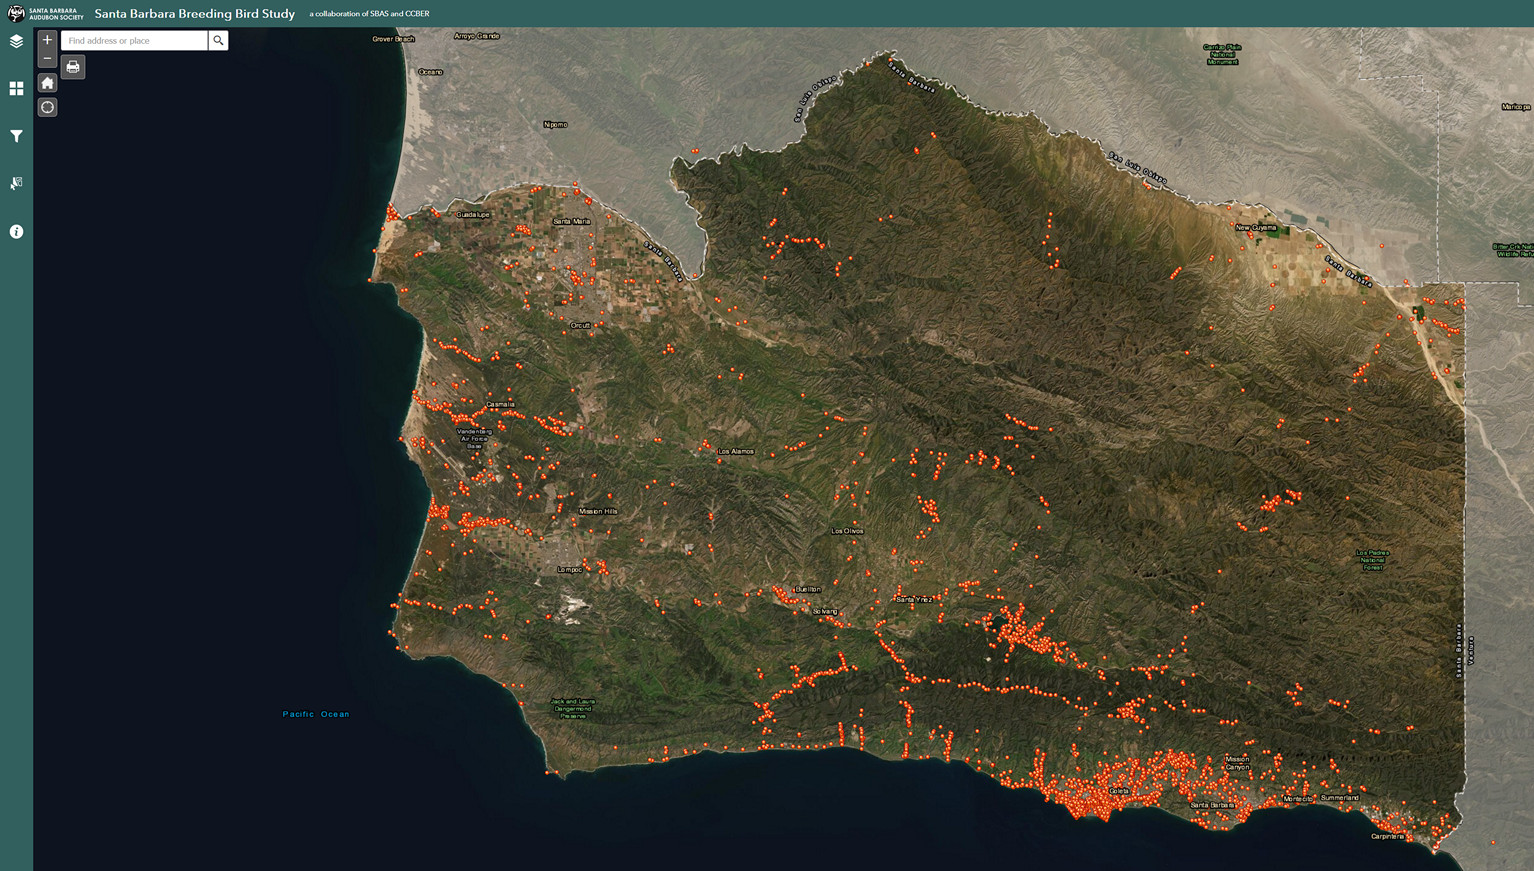
Comparing this map to this one from the Santa Barbara Audobon Society, there are obvious discrepancies. This map is a map of observed breeding activity, not just all birds like the iNaturalist map. This is being used to compare since there aren't other maps outlining bird observations in Santa Barbara. First, the iNaturalist data is not showing values right along the coast, and includes some observations in the ocean. Next, like in the last use case, these are only observations made by citizen scientists being mapped. There could be overlap with two observations of the same bird by different users or there could just be that many more birds in one area. This is a downside of using citizen science data. 

<a id='references'></a> 
### References

1. iNaturalist, https://www.inaturalist.org/
2. GBIF, https://www.gbif.org/what-is-gbif
3. REFERENCE?
4. pygbif 0.6.1 documentation, https://pygbif.readthedocs.io/en/latest/index.html
5. Santa Barbara Bird Observations https://santabarbaraaudubon.org/santa-barbara-county-breeding-bird-study/
